# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 583


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Set the units to metric, i.e., temperature in Celcius
units = "metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city}&units={units}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | albany
Processing Record 2 of Set 1 | avarua
Processing Record 3 of Set 1 | trujillo
Processing Record 4 of Set 1 | polyarnyy
Processing Record 5 of Set 1 | saguenay
Processing Record 6 of Set 1 | hawaiian paradise park
Processing Record 7 of Set 1 | adamstown
Processing Record 8 of Set 1 | kindu
Processing Record 9 of Set 1 | taiohae
City not found. Skipping...
Processing Record 10 of Set 1 | margate
Processing Record 11 of Set 1 | vorgashor
Processing Record 12 of Set 1 | port-aux-francais
Processing Record 13 of Set 1 | sisimiut
Processing Record 14 of Set 1 | katsuura
Processing Record 15 of Set 1 | thompson
Processing Record 16 of Set 1 | constantia
Processing Record 17 of Set 1 | saint-francois
Processing Record 18 of Set 1 | saint-philippe
Processing Record 19 of Set 1 | kone
Processing Record 20 of Set 1 | chahar burj
Processing Record 21 of Set 1 | mont-laurier
Processing Record 22 of Se

Processing Record 40 of Set 4 | belo sur tsiribihina
Processing Record 41 of Set 4 | les avirons
Processing Record 42 of Set 4 | minas de marcona
Processing Record 43 of Set 4 | posto fiscal rolim de moura
Processing Record 44 of Set 4 | nouadhibou
Processing Record 45 of Set 4 | turpan
Processing Record 46 of Set 4 | saipan
Processing Record 47 of Set 4 | la palma
Processing Record 48 of Set 4 | puerto ayora
Processing Record 49 of Set 4 | cabo san lucas
Processing Record 0 of Set 5 | bathsheba
Processing Record 1 of Set 5 | ambon
Processing Record 2 of Set 5 | sol'tsy
Processing Record 3 of Set 5 | visakhapatnam
Processing Record 4 of Set 5 | carutapera
Processing Record 5 of Set 5 | mar del plata
Processing Record 6 of Set 5 | nukunonu
City not found. Skipping...
Processing Record 7 of Set 5 | cromwell
Processing Record 8 of Set 5 | elliot lake
Processing Record 9 of Set 5 | ceerigaabo
Processing Record 10 of Set 5 | santo antonio
Processing Record 11 of Set 5 | prince rupert
Proces

Processing Record 31 of Set 8 | selfoss
Processing Record 32 of Set 8 | ar rutbah
Processing Record 33 of Set 8 | port hedland
Processing Record 34 of Set 8 | vingt cinq
City not found. Skipping...
Processing Record 35 of Set 8 | manokwari
Processing Record 36 of Set 8 | makurazaki
Processing Record 37 of Set 8 | yagry
City not found. Skipping...
Processing Record 38 of Set 8 | vettur
City not found. Skipping...
Processing Record 39 of Set 8 | necochea
Processing Record 40 of Set 8 | troisdorf
Processing Record 41 of Set 8 | bodo
Processing Record 42 of Set 8 | chinde
Processing Record 43 of Set 8 | machico
Processing Record 44 of Set 8 | mogocha
Processing Record 45 of Set 8 | vilhena
Processing Record 46 of Set 8 | kristiansund
Processing Record 47 of Set 8 | martuk
Processing Record 48 of Set 8 | altay
Processing Record 49 of Set 8 | tyumen
Processing Record 0 of Set 9 | itaituba
Processing Record 1 of Set 9 | spalding
Processing Record 2 of Set 9 | tarawa
Processing Record 3 of Set

Processing Record 21 of Set 12 | nizhnesortymskiy
Processing Record 22 of Set 12 | zhanaozen
Processing Record 23 of Set 12 | pudozh
Processing Record 24 of Set 12 | malaya purga
Processing Record 25 of Set 12 | puerto madero
Processing Record 26 of Set 12 | dolbeau-mistassini
Processing Record 27 of Set 12 | jinchang
Processing Record 28 of Set 12 | khandyga
Processing Record 29 of Set 12 | valparaiso
Processing Record 30 of Set 12 | toga village
City not found. Skipping...
Processing Record 31 of Set 12 | cargados carajos
City not found. Skipping...
Processing Record 32 of Set 12 | matelandia
-----------------------------
Data Retrieval Complete      
-----------------------------


In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          556
Lat           556
Lng           556
Max Temp      556
Humidity      556
Cloudiness    556
Wind Speed    556
Country       556
Date          556
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,albany,42.6001,-73.9662,8.84,84,64,0.45,US,1707613827
1,avarua,-21.2078,-159.7750,29.03,70,75,6.17,CK,1707614031
2,trujillo,-8.1160,-79.0300,23.98,83,40,5.14,PE,1707613872
3,polyarnyy,69.1989,33.4478,-11.07,92,100,2.21,RU,1707614031
4,saguenay,48.4168,-71.0657,1.16,94,98,2.67,CA,1707613968


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,albany,42.6001,-73.9662,8.84,84,64,0.45,US,1707613827
1,avarua,-21.2078,-159.7750,29.03,70,75,6.17,CK,1707614031
2,trujillo,-8.1160,-79.0300,23.98,83,40,5.14,PE,1707613872
3,polyarnyy,69.1989,33.4478,-11.07,92,100,2.21,RU,1707614031
4,saguenay,48.4168,-71.0657,1.16,94,98,2.67,CA,1707613968


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

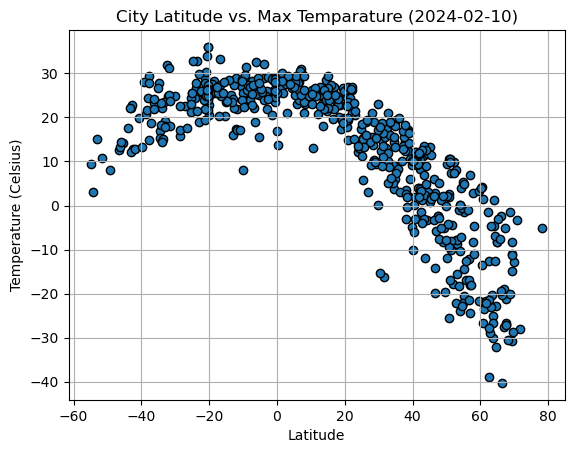

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temparature (2024-02-10)")
plt.ylabel("Temperature (Celsius)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

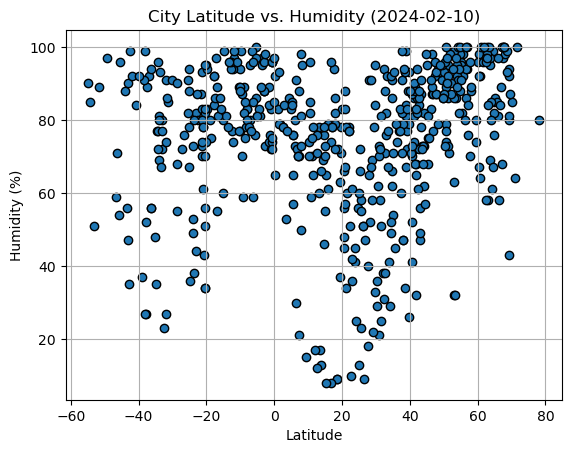

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (2024-02-10)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

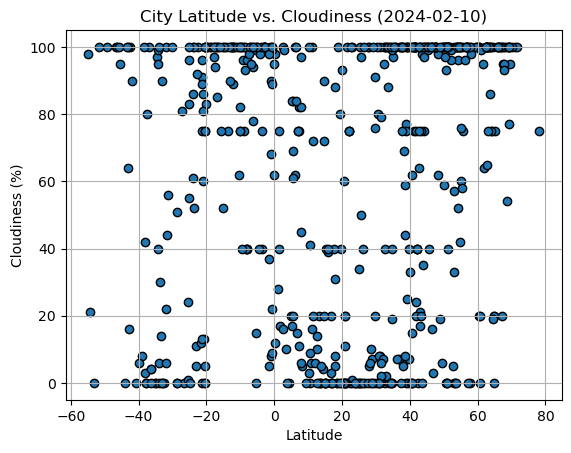

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (2024-02-10)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

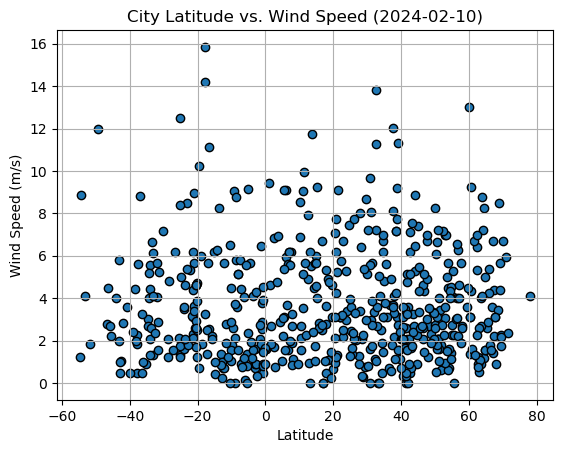

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (2024-02-10)")
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [ ]:
# Define a function to create Linear Regression plots
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

In [12]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"]>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,albany,42.6001,-73.9662,8.84,84,64,0.45,US,1707613827
3,polyarnyy,69.1989,33.4478,-11.07,92,100,2.21,RU,1707614031
4,saguenay,48.4168,-71.0657,1.16,94,98,2.67,CA,1707613968
5,hawaiian paradise park,19.5933,-154.9731,26.69,71,0,4.63,US,1707614032
8,margate,51.3813,1.3862,7.39,95,100,3.44,GB,1707614032


In [13]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"]<0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,avarua,-21.2078,-159.7750,29.03,70,75,6.17,CK,1707614031
2,trujillo,-8.1160,-79.0300,23.98,83,40,5.14,PE,1707613872
6,adamstown,-25.0660,-130.1015,25.45,88,96,12.49,PN,1707614032
7,kindu,-2.9500,25.9500,21.87,88,100,1.58,CD,1707614032
10,port-aux-francais,-49.3500,70.2167,8.15,97,100,11.96,TF,1707614032


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8636996462774207


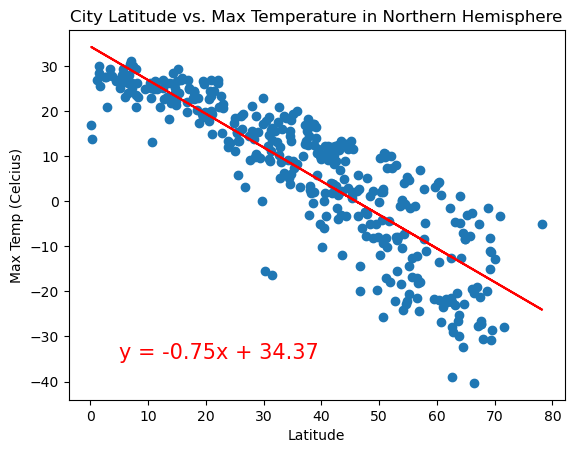

In [14]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# Define a function to create Linear Regression plots
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-value is: {rvalue}")

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, color="red")
plt.annotate(line_eq, (5,-35), fontsize=15, color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (Celcius)")
plt.title("City Latitude vs. Max Temperature in Northern Hemisphere")
plt.show()

The r-value is: 0.5302505131832689


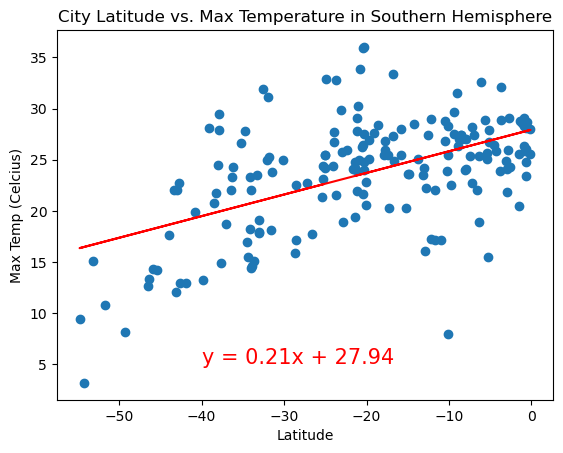

In [15]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

# Define a function to create Linear Regression plots
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-value is: {rvalue}")

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, color="red")
plt.annotate(line_eq, (-40,5), fontsize=15, color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (Celcius)")
plt.title("City Latitude vs. Max Temperature in Southern Hemisphere")
plt.show()

**Discussion about the linear relationship:** 

As we move towards the North in the Northern Hemisphere, the maximum temperature of cities decreases rapidly. The strong negative correlation coefficient (r-value) of -0.8637 indicates a strong negative linear relationship between Latitude and Max Temperature. This means that the Max Temperature reduces as Latitude increases and vice versa.

On the other hand, in the Southern Hemisphere, there is a positive relationship between Latitude and Max Temperature. This means that as we move closer to the equator, the maximum temperature rises and vice versa. The correlation coefficient r-value of ~0.5303 suggests a moderate positive linear relationship between the two variables. While the correlation is not very strong, it still indicates a noticeable pattern of association between Latitude and Max Temperature.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.39533970744256103


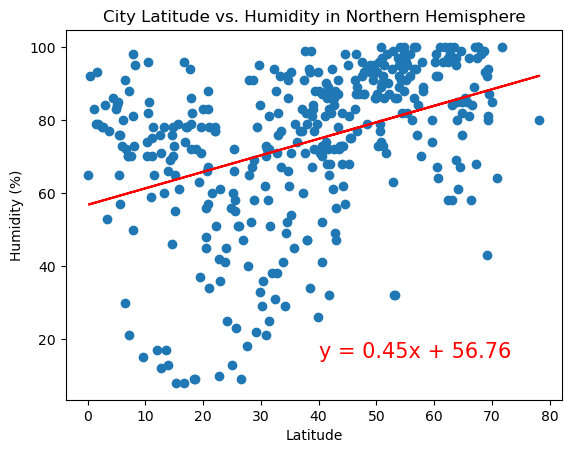

In [16]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

# Define a function to create Linear Regression plots
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-value is: {rvalue}")

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, color="red")
plt.annotate(line_eq, (40,15), fontsize=15, color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity in Northern Hemisphere")
plt.show()

The r-value is: 0.29207999258364503


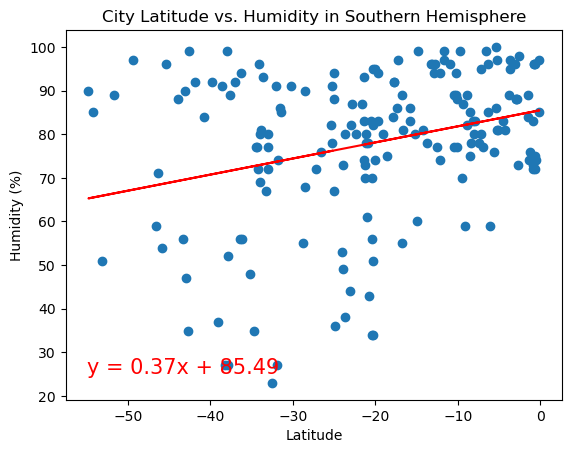

In [17]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

# Define a function to create Linear Regression plots
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-value is: {rvalue}")

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, color="red")
plt.annotate(line_eq, (-55,25), fontsize=15, color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity in Southern Hemisphere")
plt.show()

**Discussion about the linear relationship:** 

In the Northern Hemisphere, there is a moderate positive linear relationship between latitude and humidity, based on the r-value of ~0.3953 and the linear equation "Humidity = 0.45*Latitude + 56.76". This means that as latitude increases, humidity tends to increase as well, following the pattern described by the linear equation. However, it's worth noting that other factors may also influence humidity levels, and the relationship may not be entirely explained by latitude alone.

On the other hand, in the Southern Hemisphere, there is a weak positive linear relationship between latitude and humidity, based on the r-value of ~0.2921 and the linear equation "Humidity = 0.37*Latitude + 85.49". This means that while there might be some tendency for humidity to increase with increasing latitude, the correlation is not very strong, and other factors likely influence humidity levels more significantly. 

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.42055995013424696


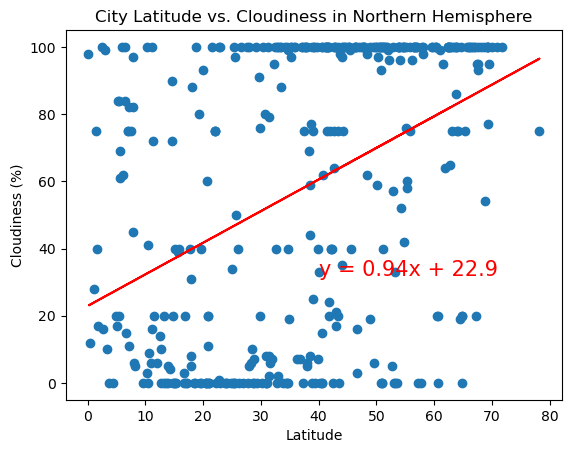

In [18]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

# Define a function to create Linear Regression plots
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-value is: {rvalue}")

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, color="red")
plt.annotate(line_eq, (40,32), fontsize=15, color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness in Northern Hemisphere")
plt.show()

The r-value is: 0.29457478345560156


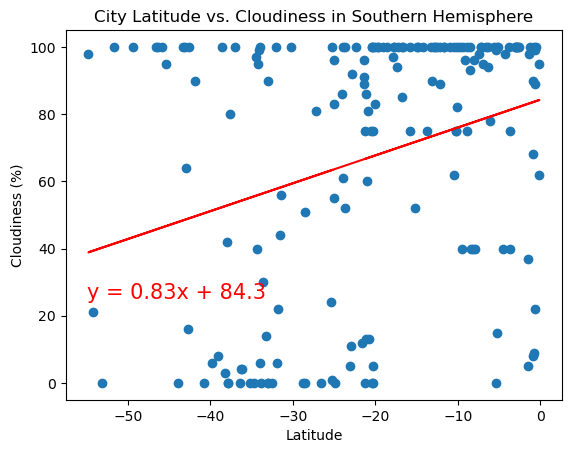

In [19]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

# Define a function to create Linear Regression plots
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-value is: {rvalue}")

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, color="red")
plt.annotate(line_eq, (-55,25), fontsize=15, color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness in Southern Hemisphere")
plt.show()

**Discussion about the linear relationship:** 

The graphs of the Northern and Southern Hemispheres indicate a moderate to weak positive correlation between latitude and cloudiness. As we move towards the north, there is a slight increase in cloudiness, as shown by the line of best fit. However, it is important to note that the data is widely dispersed, and other variables may also affect cloudiness.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: -0.06096430159939363


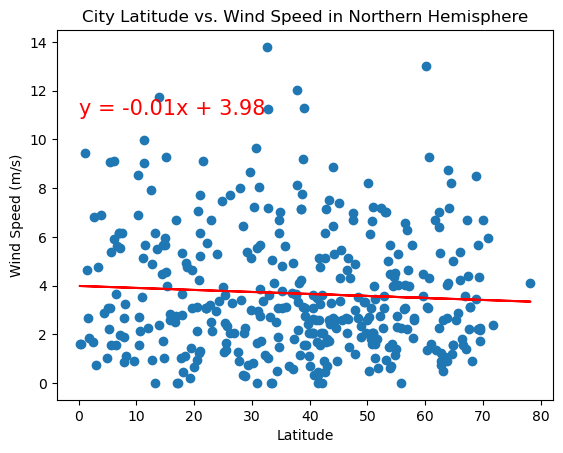

In [20]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

# Define a function to create Linear Regression plots
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-value is: {rvalue}")

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, color="red")
plt.annotate(line_eq, (0,11), fontsize=15, color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("City Latitude vs. Wind Speed in Northern Hemisphere")
plt.show()

The r-value is: -0.11155804646595294


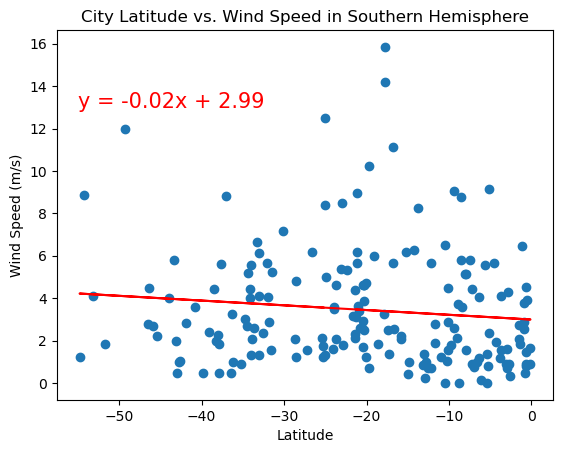

In [21]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

# Define a function to create Linear Regression plots
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-value is: {rvalue}")

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, color="red")
plt.annotate(line_eq, (-55,13), fontsize=15, color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("City Latitude vs. Wind Speed in Southern Hemisphere")
plt.show()

**Discussion about the linear relationship:***

The r-value, which shows the strength of the correlation between wind speed and latitude, is very small. This implies a weak relationship between the two variables. Although there is a minor trend of declining wind speed with increasing latitude in both hemispheres, it is not supported strongly by the data, indicating a weak correlation. Other factors, such as atmospheric conditions near the oceans, may have a more significant impact on wind speed. Therefore, relying solely on latitude to predict wind speed may not yield accurate results. It is essential to consider other variables as well.